In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn import model_selection
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt

mnist = datasets.fetch_mldata('MNIST original')

In [2]:
print(mnist)

{'DESCR': 'mldata.org dataset: mnist-original', 'COL_NAMES': ['label', 'data'], 'target': array([0., 0., 0., ..., 9., 9., 9.]), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


In [3]:
print(mnist.data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
print(mnist.target)

[0. 0. 0. ... 9. 9. 9.]


In [5]:
len(mnist.data)

70000

In [6]:
print(mnist.data[100])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  64  66
  17   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   7  87 225 252 253 232 167  83  23   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  86 253 253
 253 253 246 254 253 230 134  15   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  51 216 253 253 159  84  22  85 132 208 253 237
  87   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2 178 253
 249 109   1   0   0   0   0   8 109 249 251 168   

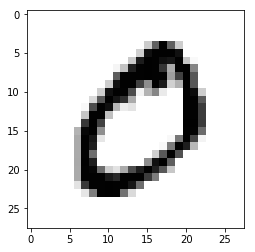

In [40]:
images = mnist.data.reshape((-1, 28, 28)) 
plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show() 

In [31]:
from tabulate import tabulate

wine = datasets.load_wine()

values = wine.data
target = wine.target

newValues = []
newfeature = []
for i in range(7):
    newfeature.append(wine.feature_names[i])
newfeature.append("Target")

for j in range(len(values)):
    content = []
    for i in range(len(values[j])):
        if i < 7:
            content.append(values[j][i]) 
    content.append(target[j])
    newValues.append(content)      
    
print(tabulate(newValues, headers=newfeature,tablefmt="grid"))

+-----------+--------------+-------+---------------------+-------------+-----------------+--------------+----------+
|   alcohol |   malic_acid |   ash |   alcalinity_of_ash |   magnesium |   total_phenols |   flavanoids |   Target |
+===========+==============+=======+=====================+=============+=================+==============+==========+
|     14.23 |         1.71 |  2.43 |                15.6 |         127 |            2.8  |         3.06 |        0 |
+-----------+--------------+-------+---------------------+-------------+-----------------+--------------+----------+
|     13.2  |         1.78 |  2.14 |                11.2 |         100 |            2.65 |         2.76 |        0 |
+-----------+--------------+-------+---------------------+-------------+-----------------+--------------+----------+
|     13.16 |         2.36 |  2.67 |                18.6 |         101 |            2.8  |         3.24 |        0 |
+-----------+--------------+-------+---------------------+------

In [7]:
data = np.random.randint(70000,size=5000)
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(mnist.data[data],mnist.target[data],train_size=0.8)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
scores = []

for k in range(2,15):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)

    clf.fit(xtrain,ytrain)

    #predicted = clf.predict(xtest[4].reshape(1, -1))

    #print(predicted)

    #images = xtest.reshape((-1, 28, 28)) 

    #plt.imshow(images[4],cmap=plt.cm.gray_r,interpolation="nearest") 
    #plt.show() 

    score = clf.score(xtest, ytest)

    scores.append(score)

    print("Score for ",k,' : ',score)
    

Score for  2  :  0.92
Score for  3  :  0.932
Score for  4  :  0.93
Score for  5  :  0.921
Score for  6  :  0.923
Score for  7  :  0.924
Score for  8  :  0.917
Score for  9  :  0.919
Score for  10  :  0.917
Score for  11  :  0.913
Score for  12  :  0.915
Score for  13  :  0.916
Score for  14  :  0.917


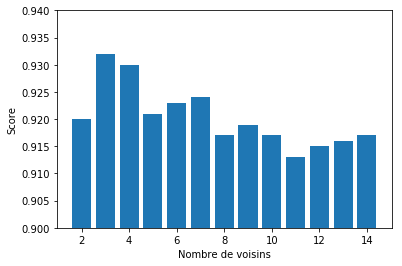

In [14]:
plt.bar(range(2,15),scores)
plt.xlabel('Nombre de voisins')
plt.ylabel('Score')
plt.ylim(0.9, 0.94)
plt.show()

In [2]:
KF = model_selection.KFold(n_splits=10,shuffle=True)
clf = neighbors.KNeighborsClassifier(n_neighbors=7)

data = np.random.randint(70000,size=15000)
X = mnist.data[data]

scores = []
for train_index, test_index in KF.split(X):
    clf.fit(mnist.data[train_index],mnist.target[train_index])
    score = clf.score(mnist.data[test_index], mnist.target[test_index])

    scores.append(score)

    print("Score for ",train_index,' : ',score)

Score for  [    0     2     5 ... 14997 14998 14999]  :  0.9913333333333333
Score for  [    0     1     2 ... 14997 14998 14999]  :  0.9873333333333333
Score for  [    0     1     2 ... 14997 14998 14999]  :  0.992
Score for  [    0     1     3 ... 14997 14998 14999]  :  0.9906666666666667
Score for  [    1     2     3 ... 14995 14996 14997]  :  0.9913333333333333
Score for  [    0     1     2 ... 14997 14998 14999]  :  0.9866666666666667
Score for  [    0     1     2 ... 14997 14998 14999]  :  0.9906666666666667
Score for  [    0     1     2 ... 14995 14998 14999]  :  0.9906666666666667
Score for  [    0     1     2 ... 14997 14998 14999]  :  0.992
Score for  [    0     1     2 ... 14997 14998 14999]  :  0.994


In [12]:
data = np.random.randint(70000,size=5000)

scores = []
for percentage in range(1,10):
    xtrain,xtest,ytrain,ytest = model_selection.train_test_split(mnist.data[data],mnist.target[data],train_size=(0.1*percentage))
    clf = neighbors.KNeighborsClassifier(n_neighbors=7)
    clf.fit(xtrain,ytrain)
    score = clf.score(xtest, ytest)

    scores.append(score)

    print("Score for ",0.1*percentage,' : ',score)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Score for  0.1  :  0.8184444444444444
Score for  0.2  :  0.88075
Score for  0.30000000000000004  :  0.8842857142857142
Score for  0.4  :  0.901
Score for  0.5  :  0.9064
Score for  0.6000000000000001  :  0.92
Score for  0.7000000000000001  :  0.9166666666666666
Score for  0.8  :  0.925
Score for  0.9  :  0.928


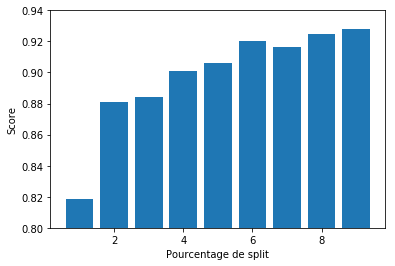

In [14]:
plt.bar(range(1,10),scores)
plt.xlabel('Pourcentage de split')
plt.ylabel('Score')
plt.ylim(0.8, 0.94)
plt.show()

In [ ]:
data = np.random.randint(70000,size=5000)
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(mnist.data[data],mnist.target[data],train_size=0.8)

scores = []

for m in range(1,10):
    clf = neighbors.KNeighborsClassifier(n_neighbors=3,p=m)

    clf.fit(xtrain,ytrain)

    #predicted = clf.predict(xtest[4].reshape(1, -1))

    #print(predicted)

    #images = xtest.reshape((-1, 28, 28)) 

    #plt.imshow(images[4],cmap=plt.cm.gray_r,interpolation="nearest") 
    #plt.show() 

    score = clf.score(xtest, ytest)

    scores.append(score)

    print("Score for ",m,' : ',score)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Score for  1  :  0.927
Score for  2  :  0.928
Score for  3  :  0.933


In [ ]:
plt.bar(range(1,10),scores)
plt.xlabel('Minkowski metric power')
plt.ylabel('Score')
plt.ylim(0.9, 0.94)
plt.show()

In [ ]:
import time

data = np.random.randint(70000,size=5000)
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(mnist.data[data],mnist.target[data],train_size=(0.1*percentage))

start = time.time()
clf = neighbors.KNeighborsClassifier(n_neighbors=3,n_jobs=1)
clf.fit(xtrain,ytrain)
end = time.time()
print("Pour 1 : ",end - start)

start = time.time()
clf = neighbors.KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
clf.fit(xtrain,ytrain)
end = time.time()
print("Pour -1 : ",end - start)